# Shallow fully connected networks on MNIST using Keras

This notebook will guide you through the use of the `keras` package to train a shallow network for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We will use Tensorflow 2 (TF 2) and the Keras API. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# First, import TF and get its version.
import tensorflow as tf
import keras # (!) # from tensorflow import keras

# Check if version >=2.0.0 is used
tf_version = tf.__version__
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

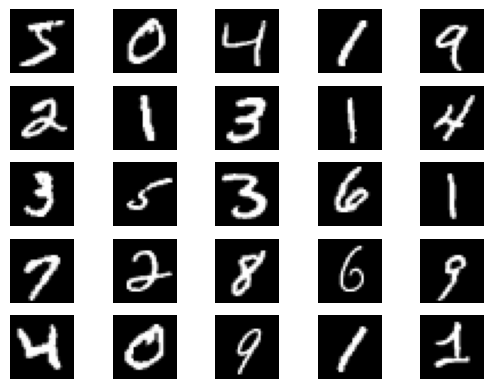

In [3]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

def show_imgs(X):
    """ Plot 5x5 grid of images """
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# NOTE: Returns numpy arrays, not tensors like pytorch

show_imgs(X_train)

In [4]:
# Flatten Image Dimensions
X_train =  X_train.reshape(60000, 784)  # flatten to shape (60000, 784), from (60000, 28, 28)
X_test =   X_test.reshape(10000, 784)   # flatten to shape (10000, 784), from (10000, 28, 28)

# Change Datatype to float
X_train =  X_train.astype('float32')   
X_test =   X_test.astype('float32')     

# Normalize the range to be between 0.0 and 1.0
X_train /= np.max(X_train)                  
X_test /= np.max(X_test)       

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# convert single class number to one-hot encoding
Y_train = keras.utils.to_categorical(y_train)            
Y_test = keras.utils.to_categorical(y_test)     
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [7]:
E = 10                # number of epochs
B = 128               # batch size

D = X_train.shape[1]  # dimension of input sample - 784 for MNIST
M = Y_train.shape[1]  # dimension of output vector


# Define the model as a Sequential type
model = tf.keras.models.Sequential()
model.add(keras.Input(shape=(D,)))
model.add(keras.layers.Dense(units=M, activation='softmax')) # fully connected (linear) layer 
# NOTE: #units = #outputs


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the **optimizer** strategy. In this case the `rmsprop` or `adam` can be used.

In [9]:
# ... compile the model with a crossentropy loss, rmsprop optimizer 
#      and defining metrics to be stored as history of the training

# use cheat sheet!
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) # track accuracy on validation batches throughout training
                                    # (at end of each epoch)

# ... call the training with the fit() function giving the tensors as 
#     inputs, defining batch size, number of epochs and validation data

log = model.fit(
    X_train,
    Y_train,
    batch_size=B,
    epochs=E,
    verbose=1,
    validation_data=(X_test, Y_test) # no separate test data
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7620 - loss: 0.9478 - val_accuracy: 0.9063 - val_loss: 0.3442
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9059 - loss: 0.3379 - val_accuracy: 0.9156 - val_loss: 0.2991
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9135 - loss: 0.3099 - val_accuracy: 0.9195 - val_loss: 0.2851
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9189 - loss: 0.2930 - val_accuracy: 0.9223 - val_loss: 0.2779
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9219 - loss: 0.2858 - val_accuracy: 0.9250 - val_loss: 0.2726
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9236 - loss: 0.2720 - val_accuracy: 0.9235 - val_loss: 0.2706
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9225 - loss: 0.2764 - val_accuracy: 0.9255 - val_loss: 0.2672
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9253 - loss: 0.2739 - val_accu

## Evaluate the network

We can do this at three levels: 
1) plot of the loss during the training phase
2) overall accuracy evaluation on test set
3) per class evaluation with confusion matrix on test set

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

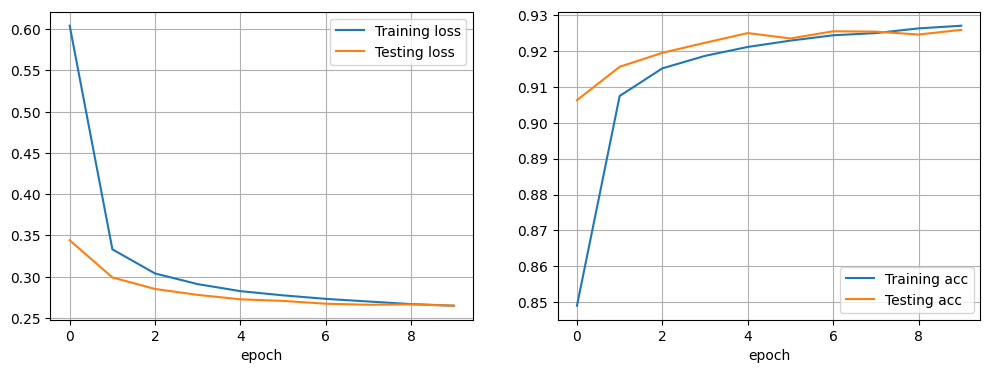

In [12]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.set_xlabel('epoch')
ax1.legend()
ax1.grid()

ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.set_xlabel('epoch')
ax2.legend()
ax2.grid()

### Model evaluation in post
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [13]:
loss_test, metric_test = model.evaluate(X_test, Y_test) # evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.9146 - loss: 0.3036
Test loss: 0.2664100229740143
Test accuracy: 0.9258999824523926


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output of this function is an array with the predicted class probabilities, from which we need to take the argmax for each row to get the class label as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [19]:
pred = model.predict(X_test, batch_size=B) # get the output posterior probabilities
y_pred = np.argmax(pred, axis=1) # collapse one-hot back to class nr by choosing max predicted probability
cm = confusion_matrix(y_test, y_pred) # ... get the confusion matrix with scikit learn confusion_matrix()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step


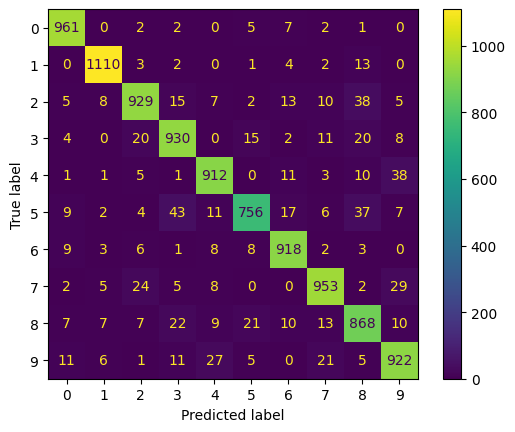

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


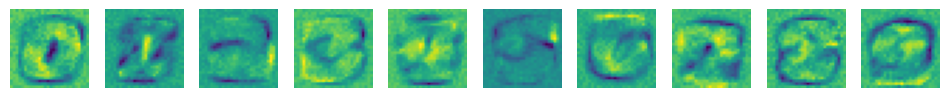

In [21]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(28,28)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)